<a href="https://colab.research.google.com/github/PriyaSharanuKhadi/93_Python_Data_Analytics_Projects/blob/main/Advanced_IPL_match_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IPL Match Analysis Using Python**



1. Load the Data
○ Load both datasets using Pandas.
○ Perform initial inspection using head(), info(), describe() functions.


In [2]:
import pandas as pd

# Load the data
matches = pd.read_csv('/content/matches.csv')
deliveries = pd.read_csv('/content/deliveries.csv')

# Initial inspection
print(matches.head())
print(matches.info())
print(matches.describe())

print(deliveries.head())
print(deliveries.info())
print(deliveries.describe())

   id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad     

**2. Data Cleaning**

○ Check for null values and handle them appropriately.

○ Correct column names if needed (e.g., team names or venue names with inconsistent formatting).

○ Drop irrelevant columns (if any) after justification.


In [3]:
# Check for null values
print(matches.isnull().sum())
print(deliveries.isnull().sum())

# Handle null values in matches dataset
matches['city'].fillna('Unknown', inplace=True)  # Replace null cities with 'Unknown'
matches['winner'].fillna('No Result', inplace=True)  # Replace null winners with 'No Result'

# Handle null values in deliveries dataset if any
# For example:
# deliveries.fillna(method='ffill', inplace=True)

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64
match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype:

<ipython-input-3-8165b3ae78ed>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  matches['city'].fillna('Unknown', inplace=True)  # Replace null cities with 'Unknown'
<ipython-input-3-8165b3ae78ed>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].met

In [4]:
# Example of correcting column names (if needed)
matches.rename(columns={'team1': 'Team1', 'team2': 'Team2', 'winner': 'Winner'}, inplace=True)

In [5]:
# Drop columns that are irrelevant (if justified)
matches.drop(columns=['umpire3'], inplace=True)  # Example: dropping a column with too many null values

3. **Exploratory Data Analysis (EDA):**
Use appropriate functions to answer the following:
Match-Level Analysis (Using Matches.csv):

○ Q1: Which team won the most matches in the dataset?
■ Hint: Use value_counts() on the winner column.

○ Q2: What is the average winning margin (runs and wickets)?
■ Hint: Use .mean() on the win_by_runs and win_by_wickets
columns.

○ Q3: What are the top 5 cities where matches were held?
■ Hint: Use value_counts() on the city column.

○ Q4: Find the venue with the most matches hosted.

○ Q5: Which player won the most "Player of the Match" awards?

In [20]:
# Use value_counts() on the 'Winner' column (renamed in a previous cell)
most_wins = matches['Winner'].value_counts()
print("Team with most wins:", most_wins.idxmax())
print(most_wins)

Team with most wins: Mumbai Indians
Winner
Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
No Result                        4
Name: count, dtype: int64


In [7]:
# Calculate the mean of win_by_runs and win_by_wickets
avg_win_by_runs = matches['win_by_runs'].mean()
avg_win_by_wickets = matches['win_by_wickets'].mean()

print(f"Average winning margin (runs): {avg_win_by_runs:.2f}")
print(f"Average winning margin (wickets): {avg_win_by_wickets:.2f}")

Average winning margin (runs): 13.28
Average winning margin (wickets): 3.35


In [8]:
# Use value_counts() on the 'city' column
top_cities = matches['city'].value_counts().head(5)
print("Top 5 cities where matches were held:")
print(top_cities)

Top 5 cities where matches were held:
city
Mumbai       101
Kolkata       77
Delhi         74
Bangalore     66
Hyderabad     64
Name: count, dtype: int64


In [9]:
# Use value_counts() on the 'venue' column
most_common_venue = matches['venue'].value_counts().idxmax()
print(f"Venue with the most matches hosted: {most_common_venue}")

Venue with the most matches hosted: Eden Gardens


In [10]:
# Use value_counts() on the 'player_of_match' column
top_player = matches['player_of_match'].value_counts().idxmax()
print(f"Player with the most 'Player of the Match' awards: {top_player}")

Player with the most 'Player of the Match' awards: CH Gayle


**Ball-Level Analysis (Using Deliveries.csv):**

○ Q6: Which batsman scored the most runs overall?
■ Hint: Group by batsman and sum up batsman_runs.



In [11]:
# Group by 'batsman' and sum up the 'batsman_runs'
batsman_total_runs = deliveries.groupby('batsman')['batsman_runs'].sum()

# Find the batsman with the most runs
top_batsman = batsman_total_runs.idxmax()  # Batsman name
top_batsman_runs = batsman_total_runs.max()  # Total runs

print(f"The batsman with the most runs is: {top_batsman} with {top_batsman_runs} runs.")

The batsman with the most runs is: V Kohli with 5434 runs.


Q7: Which bowler took the most wickets?
■ Hint: Use player_dismissed and dismissal_kind filters.

○ Q8: What is the distribution of extras (wide, no-ball, leg-byes)?
■ Hint: Use wide_runs, noball_runs, bye_runs, legbye_runs.

○ Q9: Which team scored the highest runs in a single match?
■ Hint: Group by match_id and sum the total_runs.

○ Q10: Plot the trend of total runs scored per over in a match.(visualization).

In [12]:
# Filter dismissals (exclude non-wicket types like retired hurt)
valid_dismissals = deliveries[deliveries['dismissal_kind'].notnull()]

# Group by bowler and count dismissals
bowler_wickets = valid_dismissals.groupby('bowler')['player_dismissed'].count()

# Find the bowler with the most wickets
top_bowler = bowler_wickets.idxmax()
top_wickets = bowler_wickets.max()

print(f"The bowler with the most wickets is: {top_bowler} with {top_wickets} wickets.")

The bowler with the most wickets is: SL Malinga with 188 wickets.


In [13]:
# Calculate the total for each type of extra
extras_distribution = {
    'Wides': deliveries['wide_runs'].sum(),
    'No Balls': deliveries['noball_runs'].sum(),
    'Leg Byes': deliveries['legbye_runs'].sum(),
    'Byes': deliveries['bye_runs'].sum()
}

print("Distribution of extras:")
for key, value in extras_distribution.items():
    print(f"{key}: {value}")

Distribution of extras:
Wides: 6576
No Balls: 749
Leg Byes: 3785
Byes: 884


In [14]:
# Group by match_id and batting_team, then sum total_runs
team_scores = deliveries.groupby(['match_id', 'batting_team'])['total_runs'].sum()

# Find the highest score
highest_score = team_scores.max()
highest_scoring_team = team_scores.idxmax()  # Returns a tuple (match_id, team_name)

print(f"The team with the highest runs in a single match is: {highest_scoring_team[1]} with {highest_score} runs.")

The team with the highest runs in a single match is: Royal Challengers Bangalore with 263 runs.


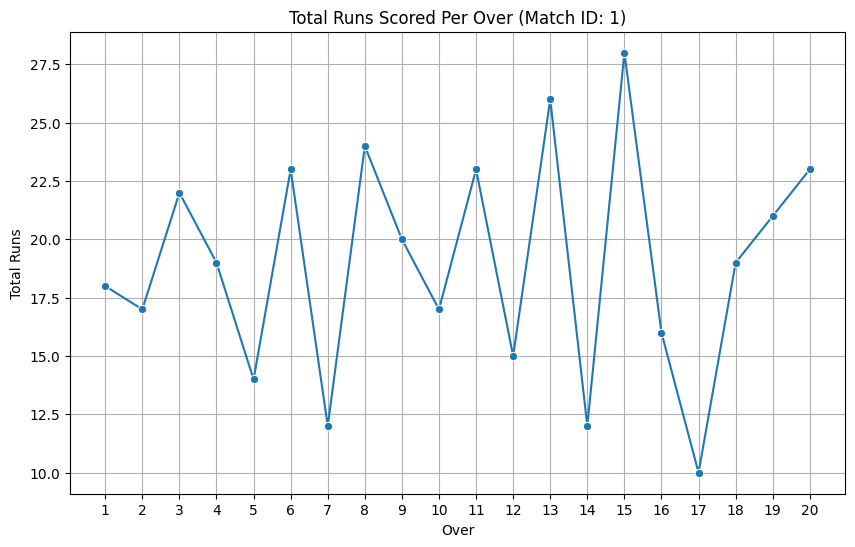

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example match_id (use a specific match_id for analysis)
example_match_id = 1

# Filter data for the specific match
match_data = deliveries[deliveries['match_id'] == example_match_id]

# Group by over and calculate total runs
runs_per_over = match_data.groupby('over')['total_runs'].sum()

# Plot the trend
plt.figure(figsize=(10, 6))
sns.lineplot(x=runs_per_over.index, y=runs_per_over.values, marker='o')
plt.title(f'Total Runs Scored Per Over (Match ID: {example_match_id})')
plt.xlabel('Over')
plt.ylabel('Total Runs')
plt.xticks(range(1, 21))  # Assuming a 20-over match
plt.grid()
plt.show()

**Visualization: **

Use Matplotlib or Seaborn to create the following visualizations:

○ Plot the top 5 teams with the most wins.

○ Bar chart of the top 5 batsmen with the highest runs.

○ Distribution of winning margins (runs and wickets) using histograms.

○ Line plot showing runs scored across overs in a specific match.



<ipython-input-21-02933e4ab9a5>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_teams.values, y=top_teams.index, palette='viridis')


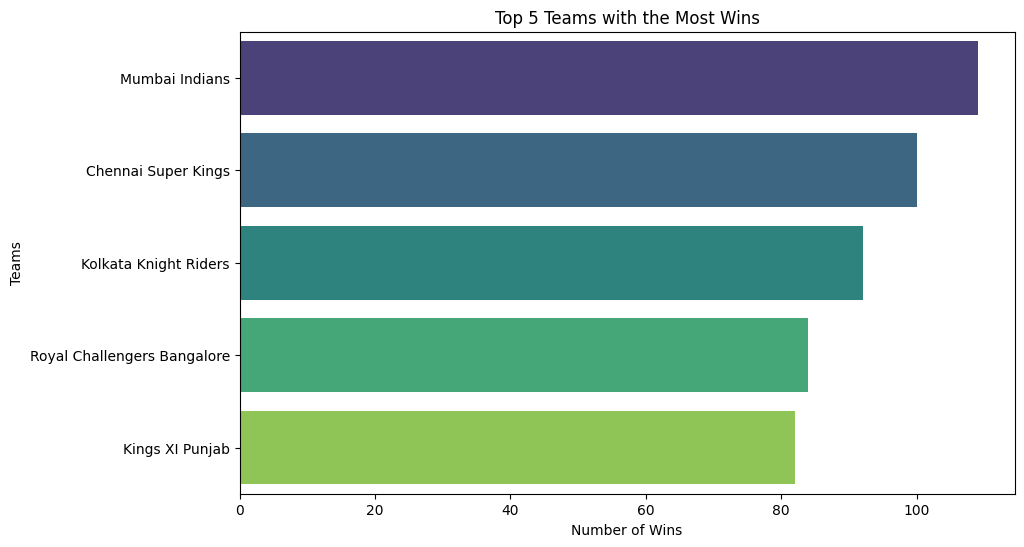

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the top 5 teams with the most wins
# Use 'Winner' instead of 'winner' as the column name was changed
top_teams = matches['Winner'].value_counts().head(5)

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(x=top_teams.values, y=top_teams.index, palette='viridis')
plt.title('Top 5 Teams with the Most Wins')
plt.xlabel('Number of Wins')
plt.ylabel('Teams')
plt.show()

<ipython-input-17-ad3a3ce4b4e1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=batsman_total_runs.values, y=batsman_total_runs.index, palette='mako')


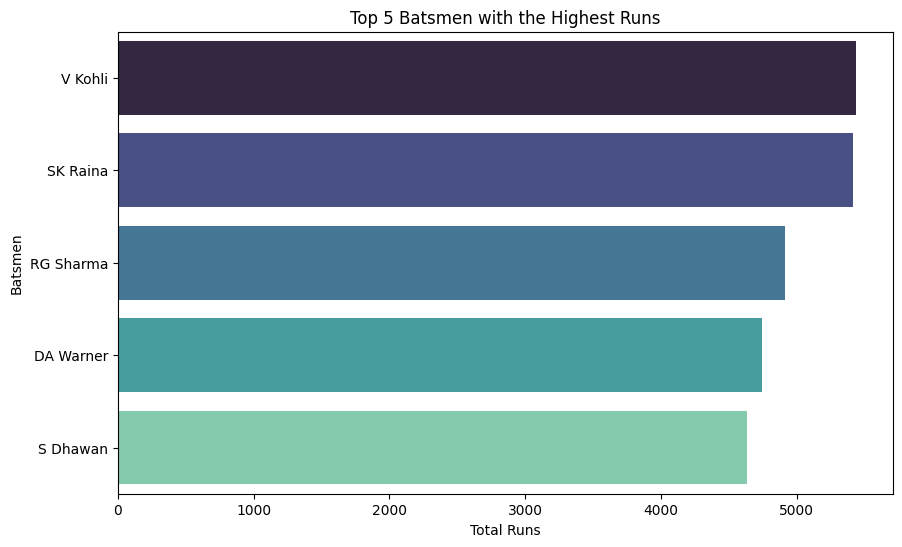

In [17]:
# Calculate the top 5 batsmen with the highest runs
batsman_total_runs = deliveries.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(5)

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(x=batsman_total_runs.values, y=batsman_total_runs.index, palette='mako')
plt.title('Top 5 Batsmen with the Highest Runs')
plt.xlabel('Total Runs')
plt.ylabel('Batsmen')
plt.show()

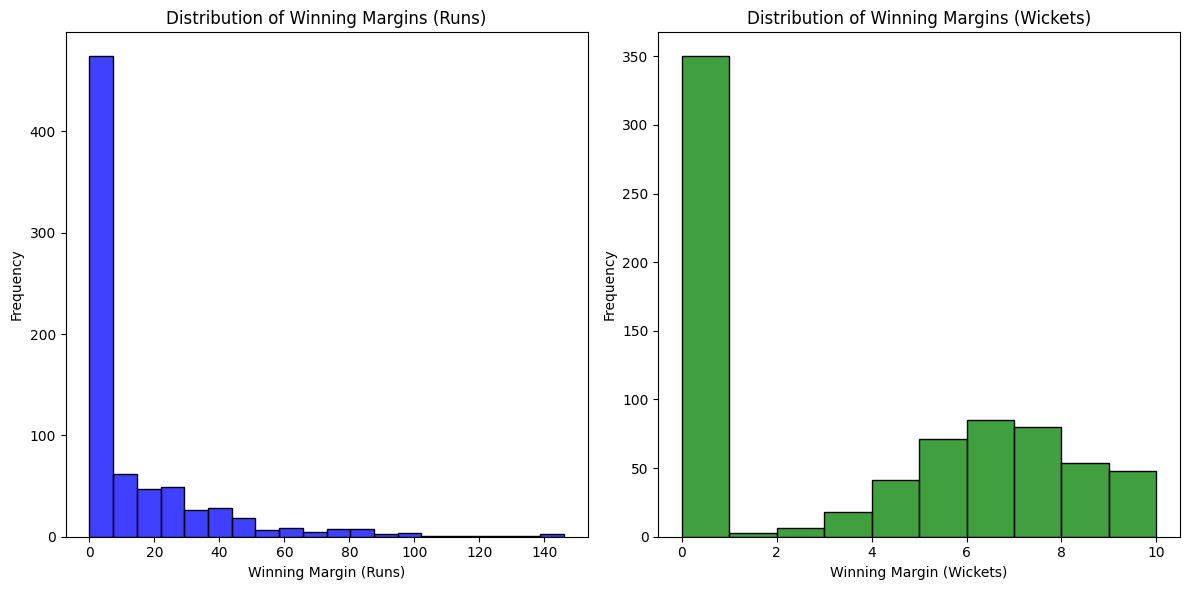

In [18]:
# Plot histograms for win_by_runs and win_by_wickets
plt.figure(figsize=(12, 6))

# Winning margins by runs
plt.subplot(1, 2, 1)
sns.histplot(matches['win_by_runs'], kde=False, bins=20, color='blue')
plt.title('Distribution of Winning Margins (Runs)')
plt.xlabel('Winning Margin (Runs)')
plt.ylabel('Frequency')

# Winning margins by wickets
plt.subplot(1, 2, 2)
sns.histplot(matches['win_by_wickets'], kde=False, bins=10, color='green')
plt.title('Distribution of Winning Margins (Wickets)')
plt.xlabel('Winning Margin (Wickets)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

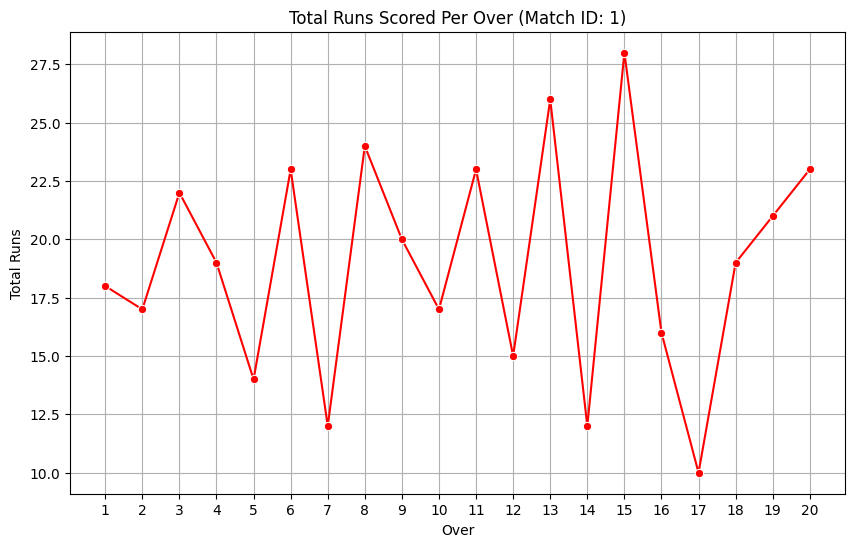

In [19]:
# Example match_id (use a specific match_id for analysis)
example_match_id = 1

# Filter data for the specific match
match_data = deliveries[deliveries['match_id'] == example_match_id]

# Group by over and calculate total runs
runs_per_over = match_data.groupby('over')['total_runs'].sum()

# Plot the trend
plt.figure(figsize=(10, 6))
sns.lineplot(x=runs_per_over.index, y=runs_per_over.values, marker='o', color='red')
plt.title(f'Total Runs Scored Per Over (Match ID: {example_match_id})')
plt.xlabel('Over')
plt.ylabel('Total Runs')
plt.xticks(range(1, 21))  # Assuming a 20-over match
plt.grid()
plt.show()

**6. Conclusion:**
**Summarize your key findings and observation from analysis**

**After performing the analysis, here are the key findings:**

**Top Teams with Most Wins: **
The visualization highlights the teams with the highest number of match wins, showing their dominance in the dataset.

**Top Batsmen with Most Runs: **
The bar chart identifies the most prolific batsmen based on their total runs scored, providing insights into individual performances.

**Winning Margins Distribution:**
The histogram of runs shows that most matches are decided by small margins, indicating closely contested games.
Similarly, the distribution of wickets shows that teams usually win with 5-8 wickets in hand.

**Runs Across Overs: **
The line plot reveals scoring patterns across overs for a specific match, which can help identify high-scoring and slow phases during an innings.

These findings can be used to better understand team performances, individual contributions, and match dynamics.